In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [39]:
#Read the data
startup = pd.read_csv("50_Startups2.csv")
startup.head(20)

,ReDespend,Administration,Marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ReDespend       50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketingspend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:

startup.isna().sum()

ReDespend         0
Administration    0
Marketingspend    0
State             0
Profit            0
dtype: int64

In [5]:
startup.corr()

,ReDespend,Administration,Marketingspend,Profit
ReDespend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketingspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


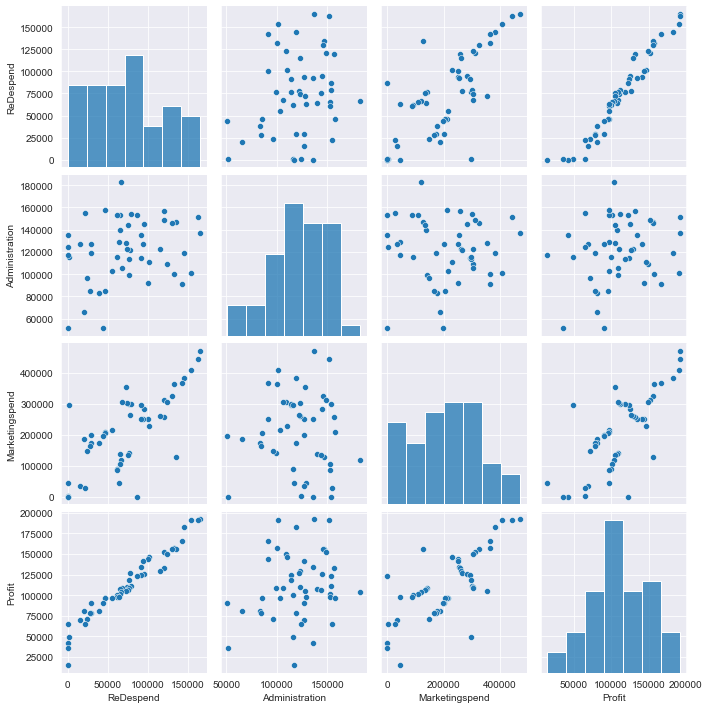

In [6]:

sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [7]:

import statsmodels.formula.api as smf 
model = smf.ols('Profit~Administration+ReDespend+Marketingspend',data=startup).fit()

In [8]:

model.params

Intercept         50122.192990
Administration       -0.026816
ReDespend             0.805715
Marketingspend        0.027228
dtype: float64

In [9]:

print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
Administration    -0.525507
ReDespend         17.846374
Marketingspend     1.655077
dtype: float64 
 Intercept         1.057379e-09
Administration    6.017551e-01
ReDespend         2.634968e-22
Marketingspend    1.047168e-01
dtype: float64


In [10]:

(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           4.53e-30
Time:                        11:57:03   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
ReDespend          0.8057      0.045     17.846      0.000       0.715       0.897
Marketingspend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
ml_a=smf.ols('Profit~Administration',data = startup).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [14]:
ml_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 29 Sep 2021   Prob (F-statistic):              0.162
Time:                        11:58:26   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
ml_R=smf.ols('Profit~ReDespend',data = startup).fit()  
print(ml_R.tvalues, '\n', ml_R.pvalues)  

Intercept    19.320288
ReDespend    29.151139
dtype: float64 
 Intercept    2.782697e-24
ReDespend    3.500322e-32
dtype: float64


# Calculating VIF

In [22]:
rsq_Administration = smf.ols('Profit~Administration+ReDespend+Marketingspend',data=startup).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)

rsq_Marketingspend=smf.ols('Profit~Administration+ReDespend+Marketingspend',data=startup).fit().rsquared  
vif_Marketingspend=1/(1-rsq_Marketingspend)

rsq_ReDespend=smf.ols('Profit~Administration+ReDespend+Marketingspend',data=startup).fit().rsquared
vif_ReDespend=1/(1-rsq_ReDespend)


# Storing vif values in a data frame
d1 = {'Variables':['Administration','Marketingspend','ReDespend'],'VIF':[vif_Administration,vif_Marketingspend,vif_ReDespend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Administration,20.302917
1,Marketingspend,20.302917
2,ReDespend,20.302917


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

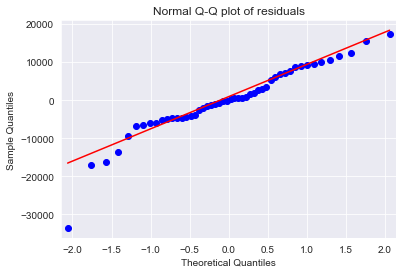

In [23]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [42]:
list(np.where(model.resid>5)) 

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

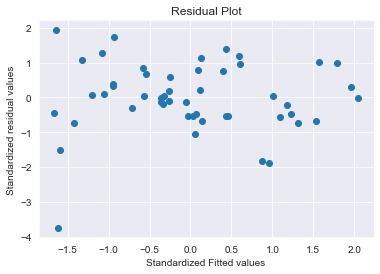

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

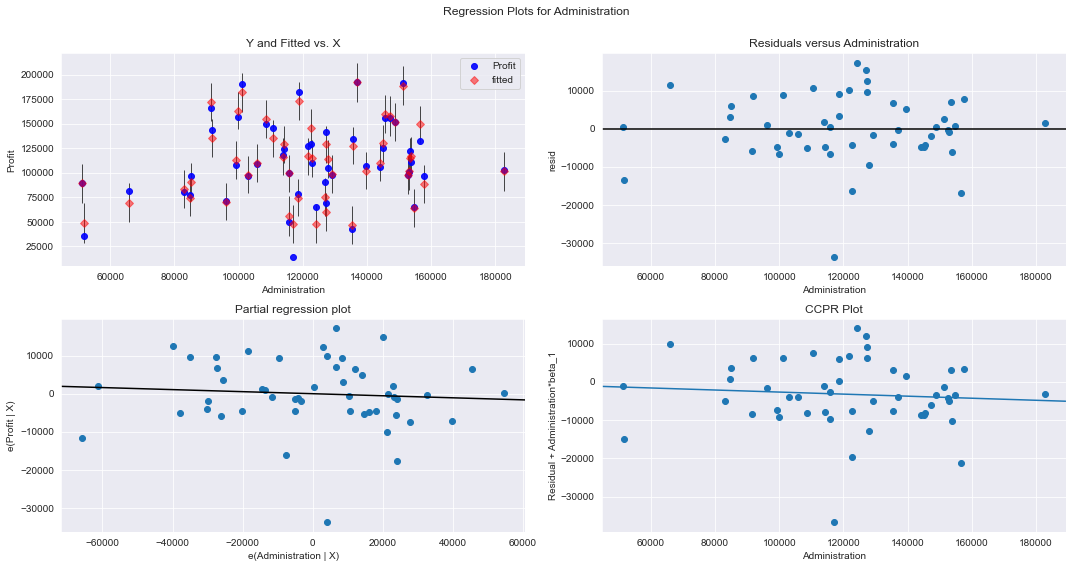

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

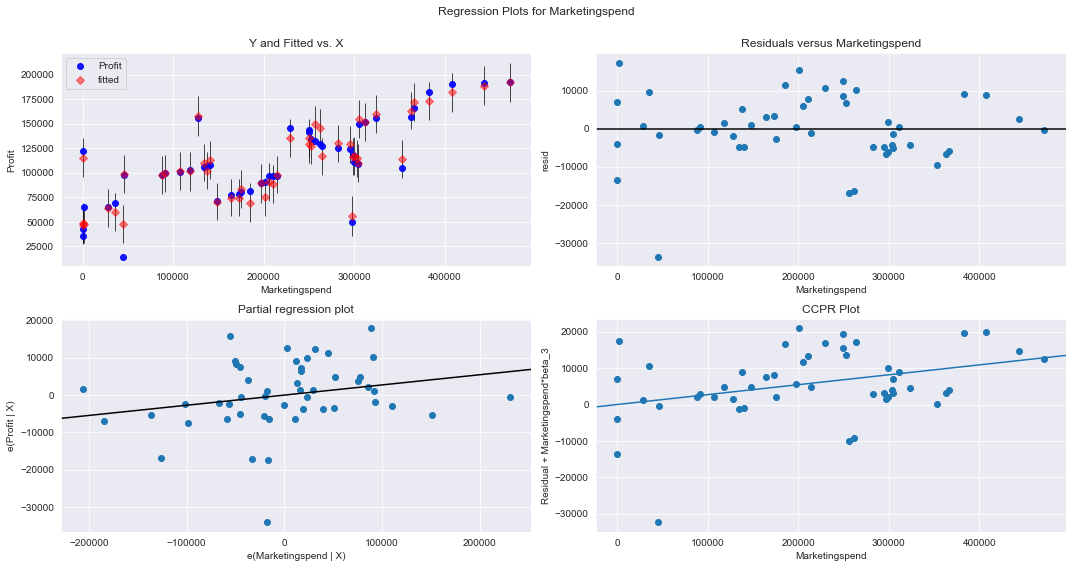

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketingspend", fig=fig)
plt.show()

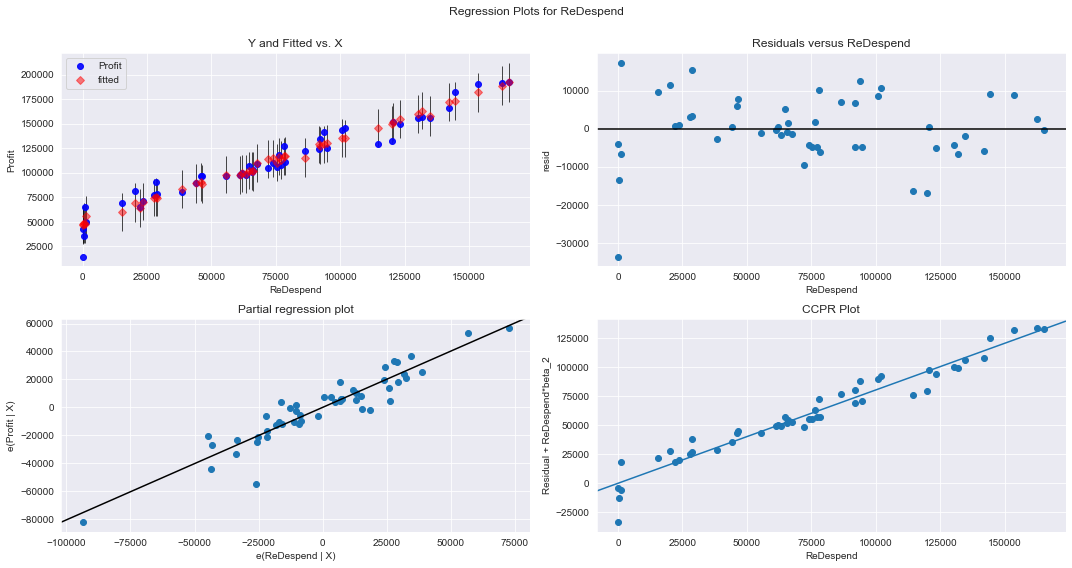

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ReDespend", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [30]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

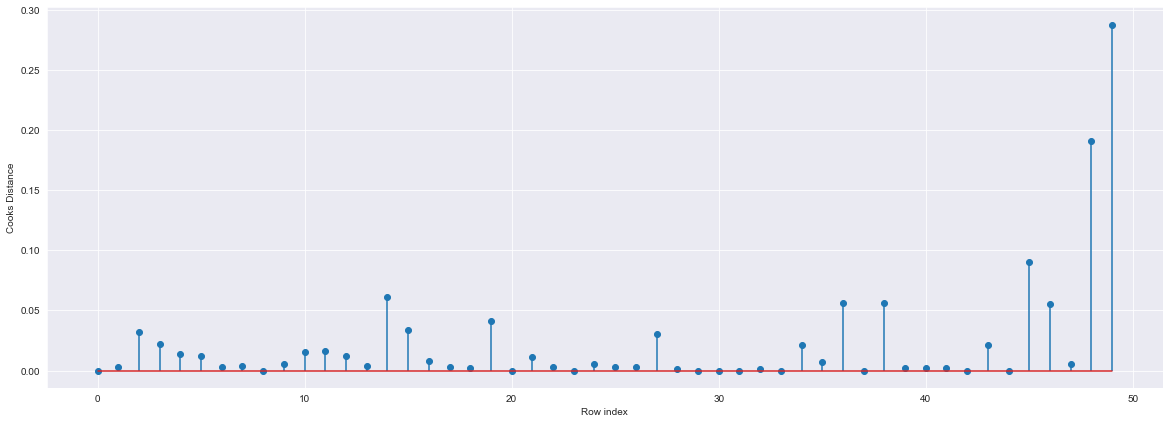

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432656)

## High Influence points

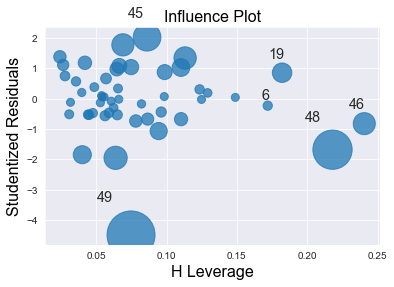

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [34]:
k =startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [35]:
startup[startup.index.isin([19,6,48,46,49])]

,ReDespend,Administration,Marketingspend,State,Profit
6,134615.46,147198.87,127716.82,California,156122.51
19,86419.70,153514.11,0.00,New York,122776.86
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [36]:
#See the differences in HP and other variable values
startup.head()

,ReDespend,Administration,Marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [37]:
#Load the data
startup_new = pd.read_csv("50_Startups2.csv")

In [38]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup1=startup_new.drop(startup_new.index[[6,19,48,46,49]],axis=0).reset_index()
startup1 

,index,ReDespend,Administration,Marketingspend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,7,130298.13,145530.06,323876.68,Florida,155752.60
7,8,120542.52,148718.95,311613.29,New York,152211.77
8,9,123334.88,108679.17,304981.62,California,149759.96
9,10,101913.08,110594.11,229160.95,Florida,146121.95


In [40]:
#Drop the original index
startup1=startup1.drop(['index'],axis=1)

In [41]:
startup1

,ReDespend,Administration,Marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,130298.13,145530.06,323876.68,Florida,155752.60
7,120542.52,148718.95,311613.29,New York,152211.77
8,123334.88,108679.17,304981.62,California,149759.96
9,101913.08,110594.11,229160.95,Florida,146121.95


# Build Model

In [ ]:
#Exclude variable "WT" and generate R-Squared and AIC values
startup1= smf.ols('Profit~Marketingspend+ReDespend',data = startup1).fit()

In [49]:
(startup1.rsquared,startup1.aic)

(0.9600882363338371, 932.4134182898541)

In [51]:
pred=startup1.predict(startup)
pred

0     190184.959753
1     187042.934804
2     178936.729821
3     171357.723424
4     169016.104344
5     161483.401742
6     153741.748779
7     158730.323646
8     151170.616902
9     152915.152030
10    134293.888625
11    134247.612552
12    129329.617408
13    128093.551767
14    148459.387023
15    144758.925445
16    118470.317131
17    131256.545618
18    129664.623977
19    113619.038190
20    118617.296279
21    120205.564349
22    117176.401660
23    112564.675144
24    112652.704025
25    103595.235143
26    111143.013949
27    117873.770651
28    103778.635974
29    103001.002904
30     99728.696213
31     98987.911434
32     98888.892206
33    100135.158542
34     93421.000661
35     92904.824135
36     80180.123134
37     91148.456537
38     73426.972470
39     86253.243253
40     79074.319037
41     78107.397773
42     74352.575384
43     63821.660099
44     68347.470707
45     51944.715241
46     64377.349384
47     51142.897086
48     51534.765980
49     53010.464450
